In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


## Loading the data

In [2]:
spCompanies = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
spIndex = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')
spStocks = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')

In [3]:
spCompanies

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,422.86,3142035701760,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064830
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,170.85,2638248673280,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054436
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,950.02,2375050067968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.049005
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,151.15,1872582148096,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038637
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,150.07,1871403024384,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NYQ,IVZ,Invesco Ltd,Invesco Ltd.,Financial Services,Asset Management,16.00,7187264000,1.018500e+09,-0.021,Atlanta,GA,United States,8489.0,Invesco Ltd. is a publicly owned investment ma...,0.000148
498,NYQ,GNRC,Generac Holdlings Inc.,Generac Holdings Inc.,Industrials,Specialty Industrial Machinery,118.01,7112380416,5.532610e+08,0.014,Waukesha,WI,United States,8315.0,"Generac Holdings Inc. designs, manufactures, a...",0.000147
499,NYQ,CMA,Comerica Incorporated,Comerica Incorporated,Financial Services,Banks - Regional,52.06,6897429504,NaN,-0.220,Dallas,TX,United States,7496.0,"Comerica Incorporated, through its subsidiarie...",0.000142
500,NMS,XRAY,DENTSPLY SIRONA Inc.,DENTSPLY SIRONA Inc.,Healthcare,Medical Instruments & Supplies,32.84,6809801216,6.320000e+08,0.030,Charlotte,NC,United States,15000.0,DENTSPLY SIRONA Inc. manufactures and sells va...,0.000141


In [4]:
spIndex

,Date,S&P500
0,2014-03-26,1852.56
1,2014-03-27,1849.04
2,2014-03-28,1857.62
3,2014-03-31,1872.34
4,2014-04-01,1885.52
...,...,...
2512,2024-03-19,5178.51
2513,2024-03-20,5224.62
2514,2024-03-21,5241.53
2515,2024-03-22,5234.18


In [5]:
spStocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,53.295383,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,52.961582,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,53.712662,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,53.751198,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,54.129921,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1797155,2024-03-19,ZTS,172.960007,172.960007,173.500000,170.270004,171.660004,3624000.0
1797156,2024-03-20,ZTS,170.990005,170.990005,173.110001,169.339996,172.649994,3697300.0
1797157,2024-03-21,ZTS,168.320007,168.320007,174.330002,168.020004,172.729996,4400900.0
1797158,2024-03-22,ZTS,168.899994,168.899994,171.360001,168.160004,168.770004,2840500.0


## Inital Model

In [6]:
import numpy as np
import pandas as pd
import random

# Load S&P 500 companies data
sp500_companies_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')

# Load S&P 500 index data
sp500_index_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

# Preprocess data
sp500_index_data['Date'] = pd.to_datetime(sp500_index_data['Date'])
sp500_companies_data['Symbol'] = sp500_companies_data['Symbol'].astype(str)

# Define Q-learning agent
class QLearningAgent:
    def __init__(self, n_actions, n_states, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.q_table = np.zeros((n_states, n_actions))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.n_states = n_states

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state, best_next_action]
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

# Define action space
n_actions = 3  # 0: Buy, 1: Sell, 2: Hold

# Define state space
n_states = len(sp500_index_data)

# Initialize Q-learning agent
agent = QLearningAgent(n_actions=n_actions, n_states=n_states)

# Simulation parameters
initial_balance = 10000
balance = initial_balance
shares_owned = {symbol: 0 for symbol in sp500_companies_data['Symbol']}

# Simulation
for i in range(1, len(sp500_index_data)):
    current_price = sp500_index_data.iloc[i]['S&P500']
    previous_price = sp500_index_data.iloc[i - 1]['S&P500']

    # Calculate reward based on action taken
    reward = 0
    action = agent.choose_action(i - 1)
    if action == 0:  # Buy
        affordable_symbols = [symbol for symbol in sp500_companies_data['Symbol'] if balance >= sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]]
        if affordable_symbols:
            chosen_symbol = random.choice(affordable_symbols)
            shares_to_buy = min(balance // sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0], 1)
            shares_owned[chosen_symbol] += shares_to_buy
            balance -= shares_to_buy * sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0]
            reward = shares_to_buy * (current_price - previous_price)
    elif action == 1:  # Sell
        for symbol, shares in shares_owned.items():
            if shares > 0:
                balance += shares * sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]
                reward = shares * (previous_price - current_price)
                shares_owned[symbol] = 0

    # Update Q-table
    agent.update_q_table(i - 1, action, reward, i)

# Print final balance
print("Final balance:", balance)


Final balance: 6.8100000000180145


## Visualizing basic policy

Final balance: 1743.8450000000057


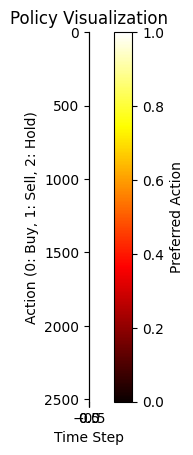

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load S&P 500 companies data
sp500_companies_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')

# Load S&P 500 index data
sp500_index_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

# Preprocess data
sp500_index_data['Date'] = pd.to_datetime(sp500_index_data['Date'])
sp500_companies_data['Symbol'] = sp500_companies_data['Symbol'].astype(str)

# Define Q-learning agent
class QLearningAgent:
    def __init__(self, n_actions, n_states, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.q_table = np.zeros((n_states, n_actions))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.n_states = n_states

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state, best_next_action]
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

# Define action space
n_actions = 3  # 0: Buy, 1: Sell, 2: Hold

# Define state space
n_states = len(sp500_index_data)

# Initialize Q-learning agent
agent = QLearningAgent(n_actions=n_actions, n_states=n_states)

# Simulation parameters
initial_balance = 10000
balance = initial_balance
shares_owned = {symbol: 0 for symbol in sp500_companies_data['Symbol']}

# Simulation
for i in range(1, len(sp500_index_data)):
    current_price = sp500_index_data.iloc[i]['S&P500']
    previous_price = sp500_index_data.iloc[i - 1]['S&P500']

    # Calculate reward based on action taken
    reward = 0
    action = agent.choose_action(i - 1)
    if action == 0:  # Buy
        affordable_symbols = [symbol for symbol in sp500_companies_data['Symbol'] if balance >= sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]]
        if affordable_symbols:
            chosen_symbol = random.choice(affordable_symbols)
            shares_to_buy = min(balance // sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0], 1)
            shares_owned[chosen_symbol] += shares_to_buy
            balance -= shares_to_buy * sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0]
            reward = shares_to_buy * (current_price - previous_price)
    elif action == 1:  # Sell
        for symbol, shares in shares_owned.items():
            if shares > 0:
                balance += shares * sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]
                reward = shares * (previous_price - current_price)
                shares_owned[symbol] = 0

    # Update Q-table
    agent.update_q_table(i - 1, action, reward, i)

# Print final balance
print("Final balance:", balance)

# Visualize policy
policy = np.argmax(agent.q_table, axis=1).reshape((-1, 1))
plt.imshow(policy, cmap='hot', interpolation='nearest')
plt.title('Policy Visualization')
plt.xlabel('Time Step')
plt.ylabel('Action (0: Buy, 1: Sell, 2: Hold)')
plt.colorbar(label='Preferred Action')
plt.show()


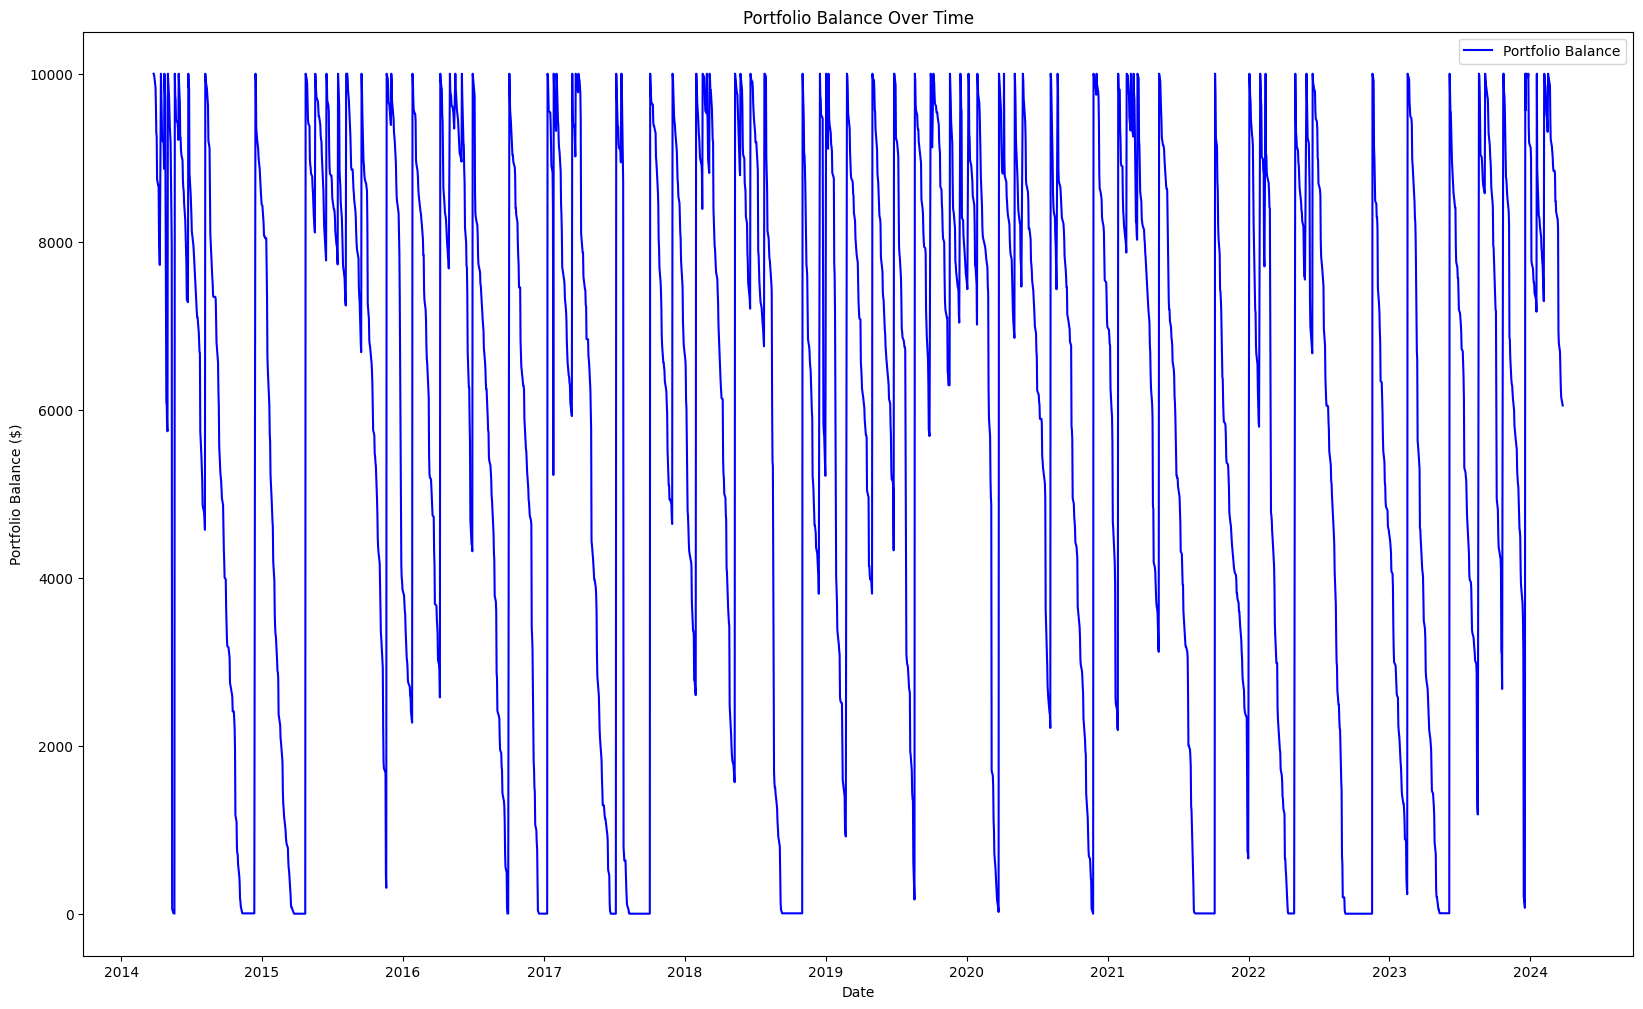

In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load S&P 500 companies data
sp500_companies_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')

# Load S&P 500 index data
sp500_index_data = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

# Preprocess data
sp500_index_data['Date'] = pd.to_datetime(sp500_index_data['Date'])
sp500_companies_data['Symbol'] = sp500_companies_data['Symbol'].astype(str)

# Define Q-learning agent
class QLearningAgent:
    def __init__(self, n_actions, n_states, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.q_table = np.zeros((n_states, n_actions))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.n_states = n_states

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state, best_next_action]
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

# Define action space
n_actions = 3  # 0: Buy, 1: Sell, 2: Hold

# Define state space
n_states = len(sp500_index_data)

# Initialize Q-learning agent
agent = QLearningAgent(n_actions=n_actions, n_states=n_states)

# Simulation parameters
initial_balance = 10000
balance = initial_balance
shares_owned = {symbol: 0 for symbol in sp500_companies_data['Symbol']}

# Lists to store simulation data
portfolio_balance_history = [initial_balance]
shares_owned_history = {symbol: [0] for symbol in sp500_companies_data['Symbol']}

# Simulation
for i in range(1, len(sp500_index_data)):
    current_price = sp500_index_data.iloc[i]['S&P500']
    previous_price = sp500_index_data.iloc[i - 1]['S&P500']

    # Calculate reward based on action taken
    reward = 0
    action = agent.choose_action(i - 1)
    if action == 0:  # Buy
        affordable_symbols = [symbol for symbol in sp500_companies_data['Symbol'] if balance >= sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]]
        if affordable_symbols:
            chosen_symbol = random.choice(affordable_symbols)
            shares_to_buy = min(balance // sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0], 1)
            shares_owned[chosen_symbol] += shares_to_buy
            balance -= shares_to_buy * sp500_companies_data[sp500_companies_data['Symbol'] == chosen_symbol]['Currentprice'].values[0]
            reward = shares_to_buy * (current_price - previous_price)
    elif action == 1:  # Sell
        for symbol, shares in shares_owned.items():
            if shares > 0:
                balance += shares * sp500_companies_data[sp500_companies_data['Symbol'] == symbol]['Currentprice'].values[0]
                reward = shares * (previous_price - current_price)
                shares_owned[symbol] = 0

    # Update Q-table
    agent.update_q_table(i - 1, action, reward, i)

    # Record simulation data
    portfolio_balance_history.append(balance)
    for symbol in sp500_companies_data['Symbol']:
        shares_owned_history[symbol].append(shares_owned[symbol])

# Plot simulation results
plt.figure(figsize=(20, 12))
plt.plot(sp500_index_data['Date'], portfolio_balance_history, label='Portfolio Balance', color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Balance ($)')
plt.title('Portfolio Balance Over Time')
plt.legend()
plt.show()
